# Face_Verification

In [105]:
!pip install mtcnn

In [106]:
!pip install keras_vggface keras_applications

In [108]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
from matplotlib import pyplot as plt

In [109]:
path="C:/Users/hp/Desktop/Dataset/data/train/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg"
image=cv2.imread(path)
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
from PIL import Image

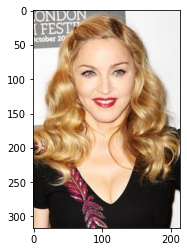

In [110]:
im=Image.open(path)
plt.imshow(image)

In [111]:
detector=MTCNN()
faces=detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [59, 38, 89, 122], 'confidence': 0.9812445640563965, 'keypoints': {'left_eye': (82, 91), 'right_eye': (125, 89), 'nose': (105, 116), 'mouth_left': (86, 130), 'mouth_right': (123, 129)}}


In [112]:
bounding_box=faces[0]['box']
print(bounding_box)
def create_bbox(image):
    faces=detector.detect_faces(image)
    bounding_box=faces[0]['box']
    print(bounding_box)
    cv2.rectangle(image,
                 (bounding_box[0],bounding_box[1]),
                  (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                  (0,155,255),
                  2)
    return image

[59, 38, 89, 122]


[59, 38, 89, 122]


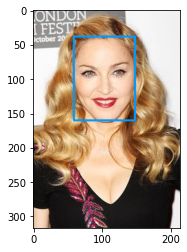

In [113]:

img=create_bbox(image)
plt.imshow(img)

In [114]:
def exface(image):
    resize=(224,224)
    faces=detector.detect_faces(image)
    x,y,w,h=faces[0]['box']
    x1=x+w
    y1=y+h
    face_boundary=image[y:y1,x:x1]
    ex_face=cv2.resize(face_boundary,resize)
    return ex_face

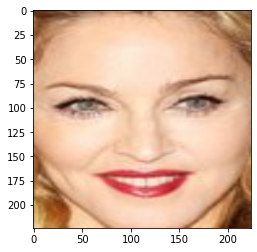

In [115]:
plt.imshow(exface(image))

In [116]:
def get_embeddings(faces):
    face=np.asarray(faces,'float32')
    face=preprocess_input(face,version=2)
    model=VGGFace(model='resnet50',include_top='False',input_shape=(224,224,3),pooling='avg')
    return model.predict(face)

In [122]:
def get_similarity(faces):
    embeddings=get_embeddings(faces)
    score=cosine(embeddings[0],embeddings[1])
    
    if score<=0.5:
        return "Face Matched",score
    else:
        return "Face Not matched",score
    

In [129]:
i1=cv2.imread("C:/Users/hp/Desktop/Dataset/data/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg")
RGB_img1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)
i2=cv2.imread("C:/Users/hp/Desktop/Dataset/data/train/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg")
RGB_img2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
i3=cv2.imread("C:/Users/hp/Desktop/Dataset/data/train/ben_afflek/httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg")
RGB_img3 = cv2.cvtColor(i3, cv2.COLOR_BGR2RGB)

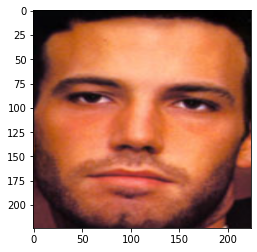

In [131]:
faces=[exface(RGB_img1),exface(RGB_img3)]
plt.imshow(faces[0])


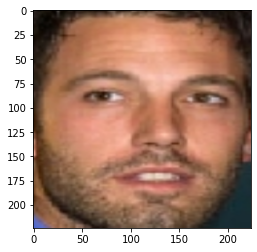

In [132]:
plt.imshow(faces[1])

In [133]:
get_similarity(faces)

('Face Not matched', 0.8403189182281494)